## ロジスティック回帰スクラッチ
ロジスティック回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

以下に雛形を用意してあります。このScratchLogisticRegressionクラスにコードを書き加えていってください。推定関係のメソッドは線形回帰と異なり、ラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。

雛形

```
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        pass
        return
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        pass
        return
```

In [1]:
import numpy as np
import logging

formatter = '%(levelname)s : %(asctime)s : %(message)s'
logging.basicConfig(filename='Logger.log', level=logging.ERROR, format=formatter)

logging.critical('critical')
logging.error('error')
logging.warning('warning')
logging.info('info')
logging.debug('debug')

In [2]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    C : float
      正則化パラメータの逆数(0~1のfloat)

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    self.label_ : 次の形のndarray, shape (n_features,)
      出力ラベル
    """
    def __init__(self, num_iter, lr, verbose, no_bias=False, C=1.0):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        if C == 0:
            print("Cに0は指定できません")
            return
        self.C = C
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        logging.debug("[START]fit")    
        self.coef_ = np.random.normal(1, 0.5, (X.shape[1]))
    
        if (X_val is not None) and (y_val is not None):
            flg = 1
        else:
            flg = 0

        # 学習用にテストデータを0 or 1にする
        self.label_ = np.array(list(set(y)))
        dict_ = {self.label_[0]: 0, self.label_[1]: 1}
        y_train = np.array([dict_[i] for i in y])
        if flg == 1:
            y_test = np.array([dict_[i] for i in y_val])
            
        for i in range(self.iter):
            # 誤差を計算
            error = self._calc_error(X, y_train)
            # パラメータを計算
            self.coef_ = self._gradient_descent(X, error)
            # loss
            self.loss[i] = self._objective(X, y_train)
            if flg == 1:
                self.val_loss[i] = self._objective(X_val, y_test)

            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("iter:{} [train_loss:{:e}]".format(i, self.loss[i]))
                if flg == 1:
                    print("iter:{} [val_loss:{:e}]".format(i, self.val_loss[i]))

        logging.debug("[END]fit")    

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        logging.debug("[START]predict")    

        proba = self.predict_proba(X)
        
        logging.debug("[END]predict")    

        return np.array([self.label_[1] if i >= 0.5 else self.label_[0] for i in proba])
    
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        logging.debug("[START_END]predict_proba")
        return self._hypothesis(X)
    
    def _sigmoid(self, X):
        """
        シグモイド関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            シグモイド関数の計算結果
        
        """
        logging.debug("[START_END]_sigmoid")
        return (1 / (1 + np.exp(-X) + 1e-7))
    
    def _hypothesis(self, X):
        """
        仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            仮定関数の計算結果
        
        """
        logging.debug("[START]_hypothesis")
        logging.debug("[_hypothesis:X]%s", X.shape)    
        logging.debug("[_hypothesis:self.coef_]%s", self.coef_.shape)    
        
        h_theta = np.dot(X, self.coef_)
        
        logging.debug("[END]_hypothesis")
        return self._sigmoid(h_theta)
        
    def _calc_error(self, X, y):
        """
        仮定関数と目的変数の誤差を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        y : 次の形のndarray, shape (n_samples, 1)
          目的変数

        Returns
        -------
          次の形のndarray, shape (1, n_features)
          誤差
        """
        logging.debug("[START]_calc_error")
        h_theta = self._hypothesis(X)
        
        logging.debug("[END]_calc_error")
        return (h_theta - y)    
    
    def _gradient_descent(self, X, error):
        """
        サンプルと誤差により係数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        error : 次の形のndarray, shape (n_samples, 1)
          _calc_errorで計算した誤差

        Returns
        -------
          次の形のndarray, shape (1, n_features)
          更新された線形関数のパラメータ
        """
        logging.debug("[START]_gradient_descent")
        
        tmp_coef = self.coef_.copy()
        tmp_coef[0] = 0
        
        logging.debug("[_gradient_descent:tmp_coef]%s", tmp_coef.shape)
        
        theta = self.coef_ - self.lr * (np.dot(error, X) + (1/self.C)*tmp_coef) / X.shape[0]  

        logging.debug("[_gradient_descent:np.dot(error, X)]%s", np.dot(error, X).shape)
        
        logging.debug("[END]_gradient_descent")
        return theta
    
    def _objective(self, X, y):
        """
        ロジスティック回帰の損失関数

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          サンプル
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        loss : 次の形のndarray, shape (n_samples,)
          損失
        """
        logging.debug("[START]_objective")
        cross_entropy = (-y*np.log(self._hypothesis(X) + 1e-7) - (1-y)*np.log(1-self._hypothesis(X)) + 1e-7).sum(axis=0)/len(X)
        regularization = (self.C/(2*len(X))) * sum(self.coef_**2)
        
        logging.debug("[END]_objective")
        return (cross_entropy + regularization)

### 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。

ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。シグモイド関数は以下の式で表されます。

$$
g(z)=\frac{1}{1+e^{-z}}
$$

線形回帰の仮定関数は次の式でした。

$$
h_\theta(x)=\theta^T・x
$$

まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。

$$
h_\theta(x)=\frac{1}{1+e^{-\theta^T・x}}
$$

$x$ : 特徴量ベクトル

$\theta$ : パラメータ（重み）ベクトル

#### 回答
- ScratchLogisticRegressionに_sigmoidメソッド・_hypothesisメソッドを追加

### 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

$$
\theta_j:=\theta_j-\alpha\frac{\partial J(\theta)}{\partial \theta_j} \\
\frac{\partial J(\theta)}{\partial \theta_0}=\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j,\space j=0 \\
\frac{\partial J(\theta)}{\partial \theta_j}=(\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j)+\frac{\lambda}{m}\theta_j, \space j \geq1
$$

$\alpha$ : 学習率

$i$ : サンプルのインデックス

$j$ : 特徴量のインデックス

$m$ : 入力されるデータの数

$h_\theta()$ : 仮定関数

$x$ : 特徴量ベクトル

$\theta$ : パラメータ（重み）ベクトル

$x^{(i)}$ : i番目のサンプルの特徴量ベクトル

$y^{(i)}$ : i番目のサンプルの正解ラベル

$\theta_j$ : j番目のパラメータ（重み）

$λ$ : 正則化パラメータ

#### 回答
- コンストラクタにパラメータ"C"を追加。
- ScratchLogisticRegressionに_calc_errorメソッド・_gradient_descentメソッドを追加。
- fitメソッドに以下の処理を追加
```
        if self.no_bias == False:
            self.coef_ = np.random.normal(1, 0.5, (X.shape[1]+1))
        else:
            self.coef_ = np.random.normal(1, 0.5, (X.shape[1]))

        if (X_val is not None) and (y_val is not None):
            flg = 1
        else:
            flg = 0
        
        for i in range(self.iter):
            # 誤差を計算
            error = self._calc_error(X, y)
            logging.debug("[fit:error]%s", error.shape)
            # パラメータを計算
            self.coef_ = self._gradient_descent(X, error)
```

### 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。

仮定関数 $h_\theta(x)$ の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。

#### 回答
- predict_probaメソッドのリターン処理追加
- predictメソッドに処理追加

### 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

なお、この数式には正則化項が含まれています。

＊数式が見切れる場合、DIVERを全画面にして御覧ください。

$$
J(\theta)=\frac{1}{m}\sum_{i=1}^m[-y^{(i)}log(h_\theta(x^{(i)}))-(1-y^{(i)})log(1-h_\theta(x^{(i)}))]+\frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2
$$

$m$ : 入力されるデータの数

$h_\theta()$ : 仮定関数

$x$ : 特徴量ベクトル

$\theta$ : パラメータ（重み）ベクトル

$x^{(i)}$ : i番目のサンプルの特徴量ベクトル

$y^{(i)}$ : i番目のサンプルの正解ラベル

$\theta_j$ : j番目のパラメータ（重み）

$n$ : 特徴量の数

$λ$ : 正則化パラメータ

#### 回答
- _objectiveメソッドを追加

### 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import pandas as pd

data = load_iris()

X = pd.DataFrame(data=data.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(data=data.target, columns=['Species'])

df = pd.concat([X, y], axis=1)
df = df.query('Species==[1, 2]')
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.262000,2.872000,4.906000,1.676000,1.500000
std,0.662834,0.332751,0.825578,0.424769,0.502519
min,4.900000,2.000000,3.000000,1.000000,1.000000
25%,5.800000,2.700000,4.375000,1.300000,1.000000
50%,6.300000,2.900000,4.900000,1.600000,1.500000
75%,6.700000,3.025000,5.525000,2.000000,2.000000
max,7.900000,3.800000,6.900000,2.500000,2.000000


In [4]:
X = np.array(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = np.array(df[['Species']]).reshape(-1,)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=32)

In [5]:
lr = ScratchLogisticRegression(num_iter=500, lr=0.01, verbose=False)
lr.fit(X_train, y_train, X_test, y_test)
y_pred = lr.predict(X_test)
print("正解率:{}".format(accuracy_score(y_test, y_pred)))
print("適合率:{}".format(precision_score(y_test, y_pred)))
print("再現率:{}".format(recall_score(y_test, y_pred)))
print("F値:{}".format(f1_score(y_test, y_pred)))
print("混合行列")
print(confusion_matrix(y_test ,y_pred))

正解率:0.88
適合率:1.0
再現率:0.8
F値:0.888888888888889
混合行列
[[12  3]
 [ 0 10]]


In [6]:
lr_sklearn = LogisticRegression()
lr_sklearn.fit(X_train, y_train)
y_pred_sklearn = lr_sklearn.predict(X_test)
print("正解率:{}".format(accuracy_score(y_test, y_pred_sklearn)))
print("適合率:{}".format(precision_score(y_test, y_pred_sklearn)))
print("再現率:{}".format(recall_score(y_test, y_pred_sklearn)))
print("F値:{}".format(f1_score(y_test, y_pred_sklearn)))
print("混合行列")
print(confusion_matrix(y_test ,y_pred))

正解率:0.88
適合率:1.0
再現率:0.8
F値:0.888888888888889
混合行列
[[12  3]
 [ 0 10]]


### 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

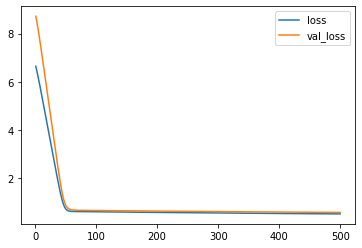

In [7]:
import matplotlib.pyplot as plt

x = np.arange(1, len(lr.loss)+1)
plt.plot(x, lr.loss, label="loss")
plt.plot(x, lr.val_loss, label="val_loss")
plt.legend()
plt.show()

### 【問題7】決定領域の可視化
決定領域を可視化してください。

決定領域を描画するため、特徴量にsepal_lengthとpetal_lengthを選択する。

In [8]:
X_2 = np.array(df[['sepal_length', 'petal_length']])
y_2 = np.array(df[['Species']]).reshape(-1,)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2,
                                                            test_size=0.25,
                                                            random_state=32)

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

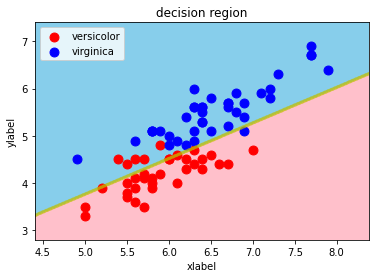

In [10]:
lr_2 = ScratchLogisticRegression(num_iter=500, lr=0.01, verbose=False)
lr_2.fit(X_train_2, y_train_2, X_test_2, y_test_2)
# 学習データ
decision_region(X_train_2, y_train_2, lr_2)

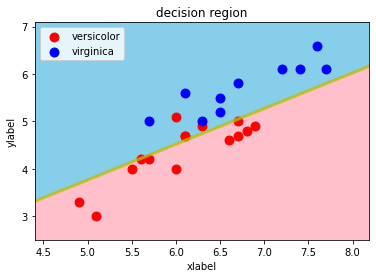

In [11]:
# テストデータ
decision_region(X_test_2, y_test_2, lr_2)

### 【問題8】（アドバンス課題）重みの保存
検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。pickleモジュールやNumPyのnp.savezを利用します。

[pickle — Python オブジェクトの直列化 — Python 3.7.4 ドキュメント](https://docs.python.org/ja/3/library/pickle.html)

[numpy.savez — NumPy v1.17 Manual](https://numpy.org/doc/stable/reference/generated/numpy.savez.html)

In [12]:
filename_np="coef_lr_np"

# 保存
np.save(filename_np, (lr_2.coef_, lr_2.label_))

In [13]:
# ロード
load_np = np.load(filename_np+".npy")
print(load_np)
print(lr_2.coef_, lr_2.label_)

[[-1.01570654  1.34818418]
 [ 1.          2.        ]]
[-1.01570654  1.34818418] [1 2]


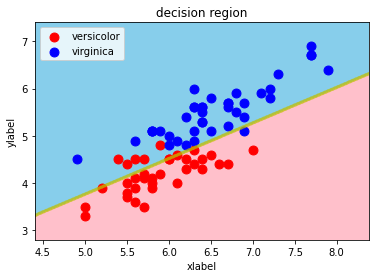

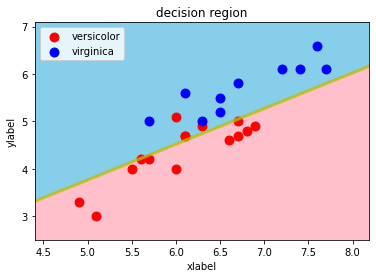

In [14]:
# 学習(ロードした重みを設定)
lr_3 = ScratchLogisticRegression(num_iter=500, lr=0.01, verbose=False)
lr_3.coef_ = load_np[0]
lr_3.label_ = load_np[1]

# 予測
decision_region(X_train_2, y_train_2, lr_3)
decision_region(X_test_2, y_test_2, lr_3)

正しく実装できたと思われる。